Business Objectives 
What kind of telecom company is this? (subscription-based, recurring revenue)
this recurring revenue plan each call and min is priced and cost is paid by customers
What does customer churn mean operationally?
Customer churn operationally mean the customer has opted to use other telecom companys network insted of our network
Who will use this model? (retention / marketing / operations)
The retention team will look into this models data and try to come up with new plans based on data total minues affect cost  to reduce customer churn in future also while analysing rival telecom teams plans cost per min and using competetive pricing to give customers advantage

When will this prediction be used? (monthly, quarterly, pre-renewal)
the prediction will be used after analysing best option by analysing data set theere are no plans and charges are based on total minutes so using prediciton montly or quarterly is useful because msot companies hike charges each half year 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("C:\\EDA Project\\churn-bigml-20.csv")
data.head(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


dataset is assumed for familiarity and only used to learn customer behaviour patterns and aim to reduce customer churn

#count rows and columns of dataset

In [3]:

print("number of rows are", data.shape[0] ,"number of columns are", data.shape[1])

number of rows are 667 number of columns are 20


Get dataset information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [5]:
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')>


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
print(data.describe())

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463        

In [8]:
missing = data.isnull().sum()
print(missing)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


<Axes: >

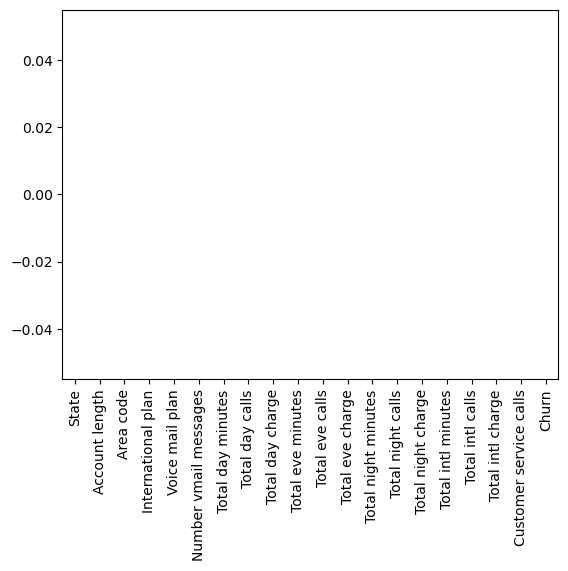

In [9]:
missing.plot.bar()

This Bar chart says what we wanted to know there are no missing values in this table which need to be handled


The Above Table doesnt mean that there are no null values ... in data missing values are also in form of 0,or placeholders which are bad and affect data purity

In [10]:
for feature in data.columns:
    unique = data[feature].unique()
    print(f"column'{feature}' 'unique'{unique}")

column'State' 'unique'['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']
column'Account length' 'unique'[117  65 161 111  49  36 119  10  68  74  85  46 128 155  73  77 108  95
 141  63  97  75 127 121   6  32  64  25  93 208 122  99  45 139 215  94
  86 106  92  78  83 144 143  81 145  89 199  96 124 148 135  87  54  35
  84 112 129 140  70  79  91 149  60 115 102  55 126  52  67 165 150  26
  69 157  80  44 101  82  39  30 105 166 172  88 153 109  27   3  43 116
 107 123 110 176  13 156 158 103 151  90  33 167  38 100 136 120 104   1
  76 132 114  48  59  50  12 131 217 134  53  72  98 118 130 159  37  29
 113 163  56  51  66 193   7  71  31 190 170 125 232 182 197  57 137  21
 191  16  34 146 138  62 201 133 162 195 177  41  61 152 175 160  19 142
 189 169  15 180 183  58 196 1

*Variables Description*
State – The state the telecom service user belongs to.

Account Length – How long account has been active.

Area Code – Identifier for a geographic region.

International Plan – Did user opted for International Plan ?

Voice mail Plan – Is Voice mail plan activated?

Number vmail messages – Number of voice mail messages sent.

Total day minutes – Total minutes used in day.

Total day calls – Total day calls made.

Total day charge – Total price user was charged for day calls.

Total eve minutes – Total minutes used for calls in evening.

Total eve calls – Total evening calls made.

Total eve charge – Total price user was charged for evening calls.

Total night minutes – Total minutes used for calls in night.

Total night calls – Total night calls made.

Total night charge – Total price user was charged for night calls.

Total intl minutes – Total minutes used for international calls.

Total intl calls – Total calls made for international numbers.

Total intl charge – Total price user was charged for international calls

Customer service calls – Number of Customer service calls user made.

Churn – Did user churned the services?

Data Wrangling - in EDA we always replace yes and no columns with true and false as its better when we integrate machine learning models like logistic regression

In [11]:
data.replace({"Yes": True,"No": False}, inplace = True)# here inplace true means changes happen in actual data frame not a copy!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    bool   
 4   Voice mail plan         667 non-null    bool   
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

#data visualization

GET Categorical columns and numerical columns seperately and plot them 

In [22]:
num = data.select_dtypes(include=['int64','float64']).columns
print("Numerical data is:", num.tolist())
num_features = ['Total day minutes','Total day calls','Total day charge', 'Total intl calls', 'Total intl charge']
cat = data.select_dtypes(include=['object','bool']).columns
print("Categorical data is :",cat.tolist())

Numerical data is: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Categorical data is : ['State', 'International plan', 'Voice mail plan', 'Churn']


#univariate analysis 
Here performing univariate analysis on 
numerical features - 'Total day minutes' , 'Total day calls' ,  'Total day charge'  
categorical featuress - 'State', 'International plan', 'Voice mail plan

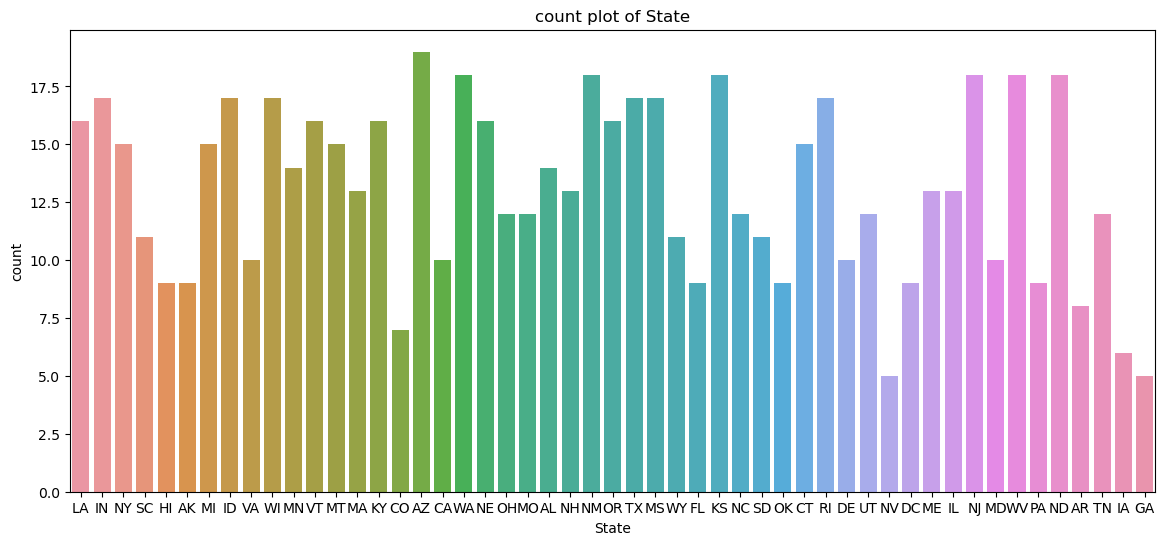

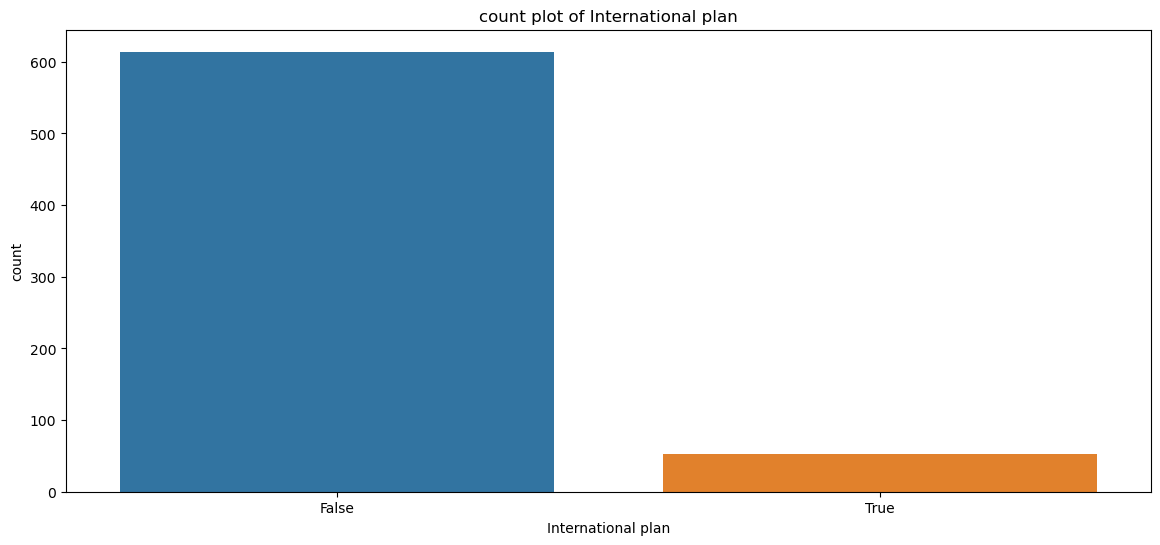

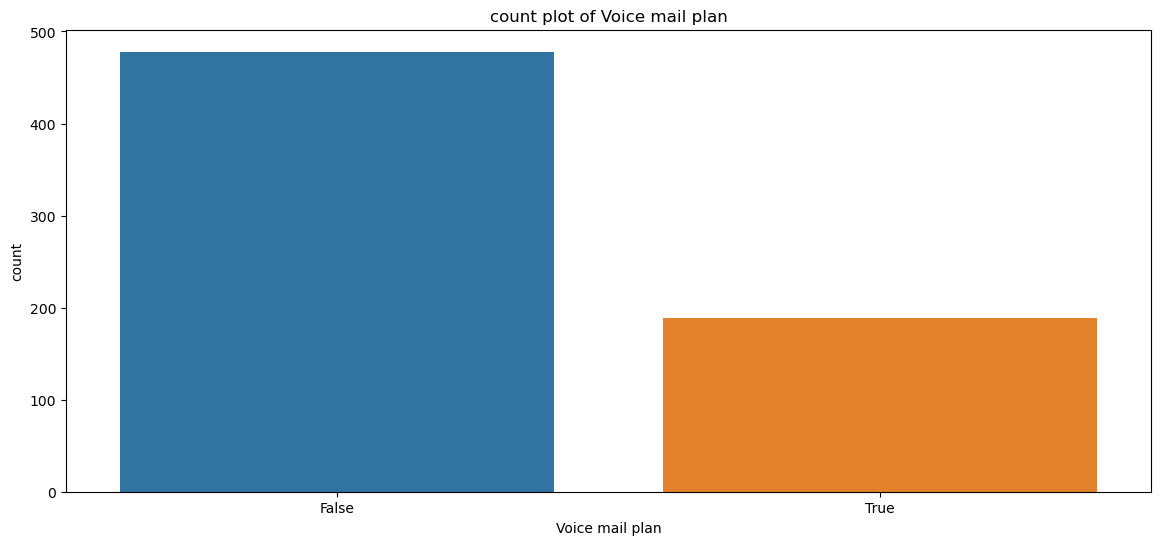

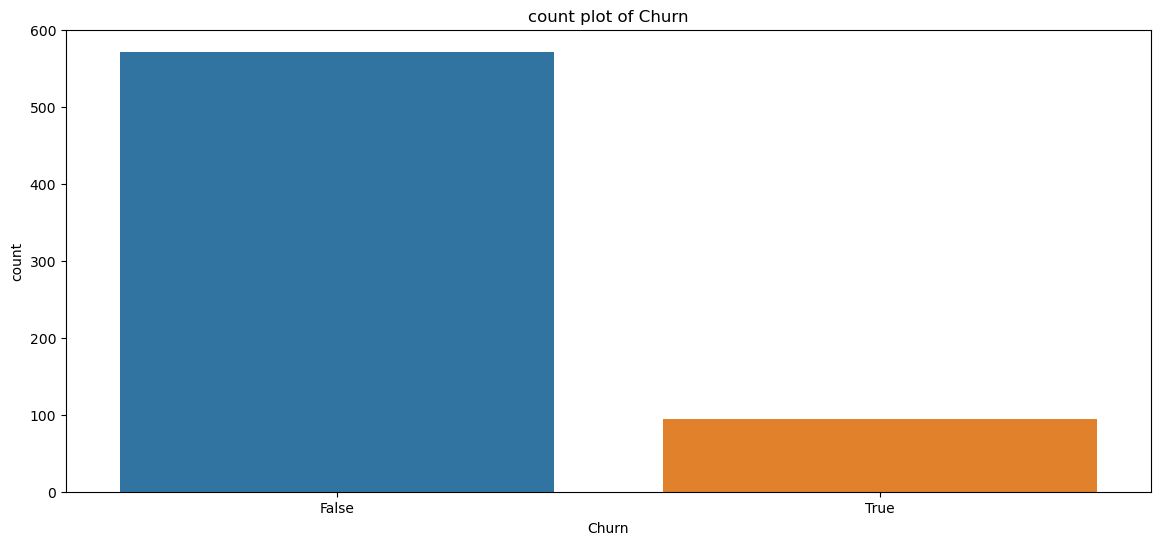

In [13]:
#categorical data visualization
for col in cat:
    plt.figure(figsize=(14,6))
    sns.countplot(data=data,x=col)
    plt.title(f'count plot of {col}')
    plt.xticks()
    plt.show()

based on categorical data chustomer churn is very less 

C:\Users\gubba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


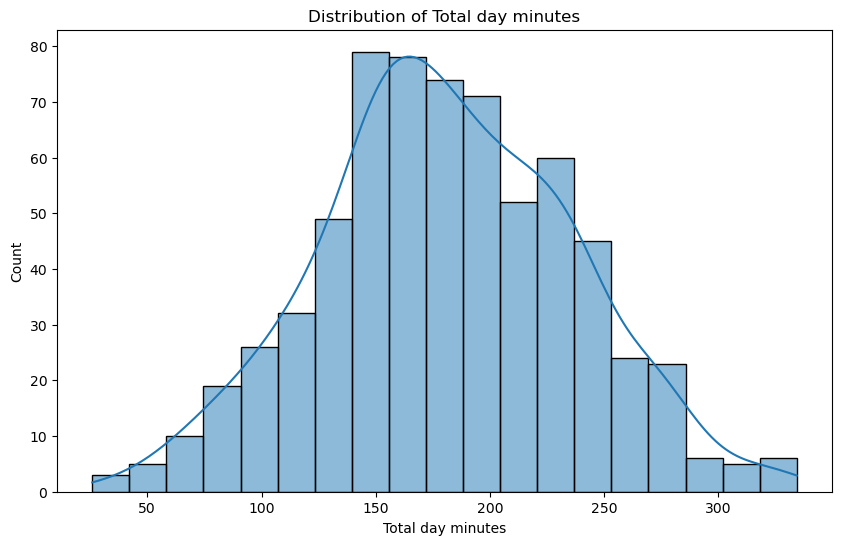

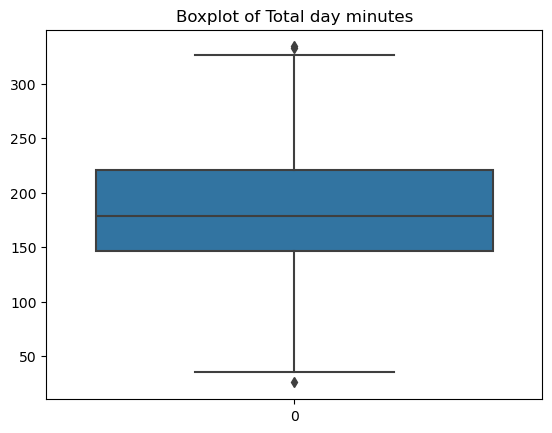

C:\Users\gubba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


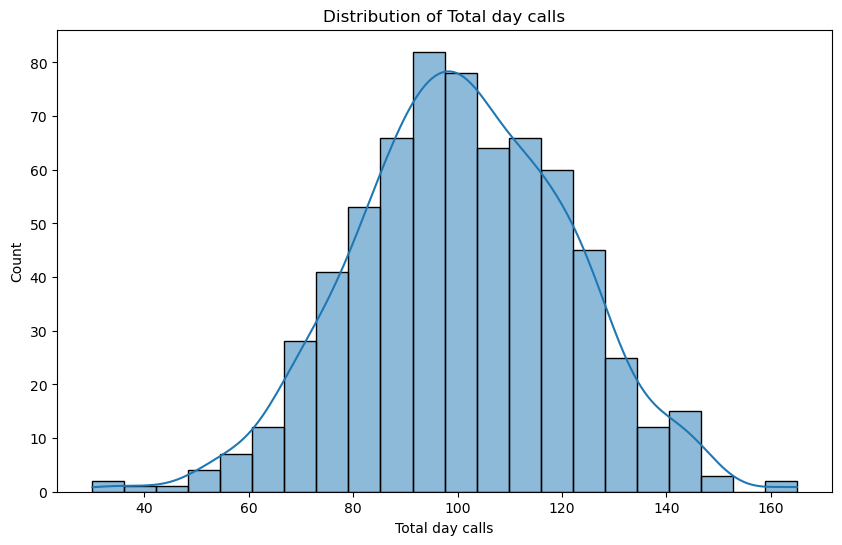

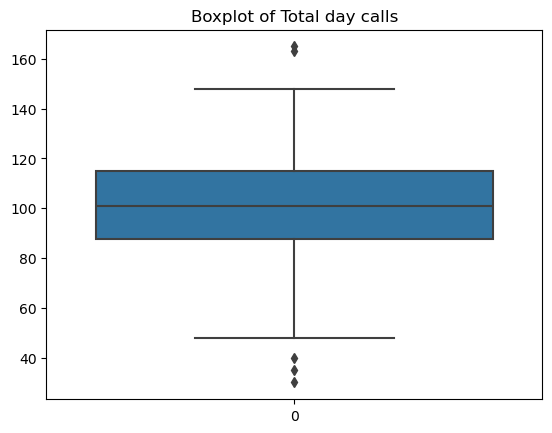

C:\Users\gubba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


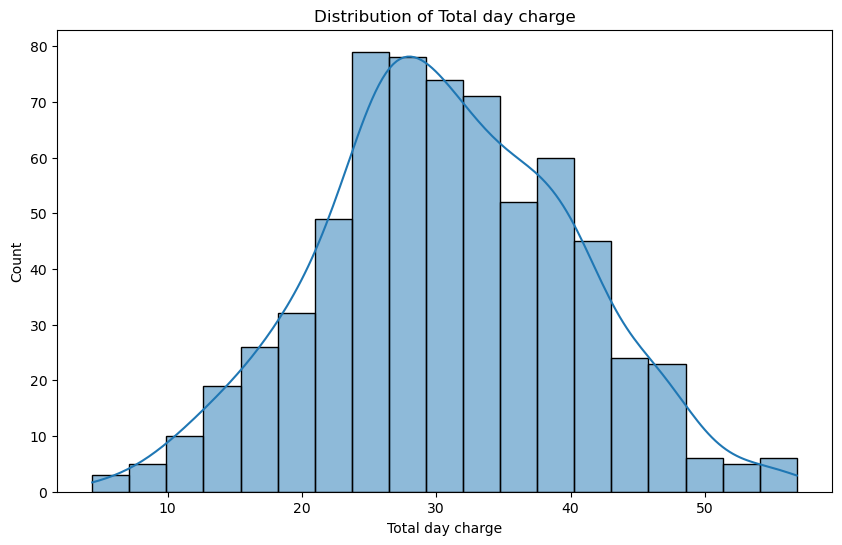

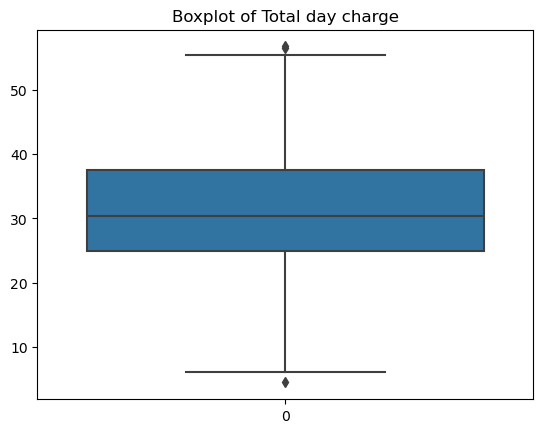

C:\Users\gubba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


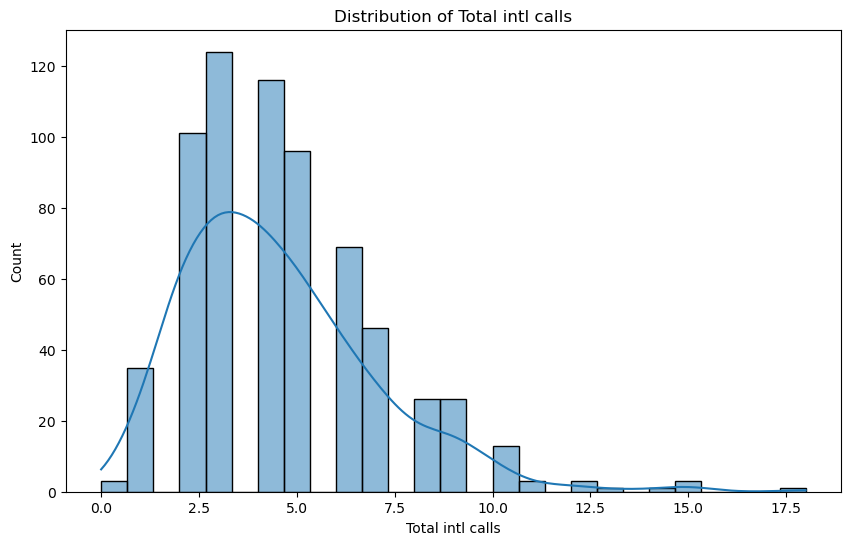

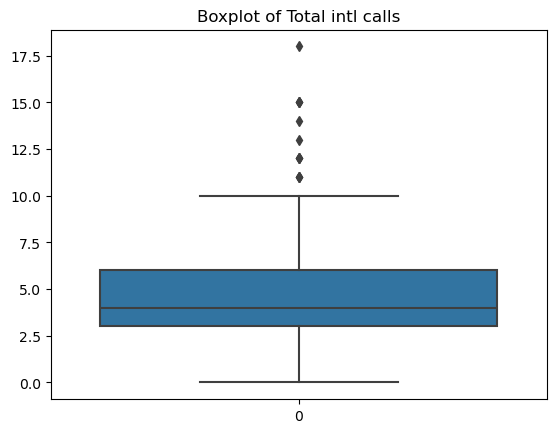

C:\Users\gubba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


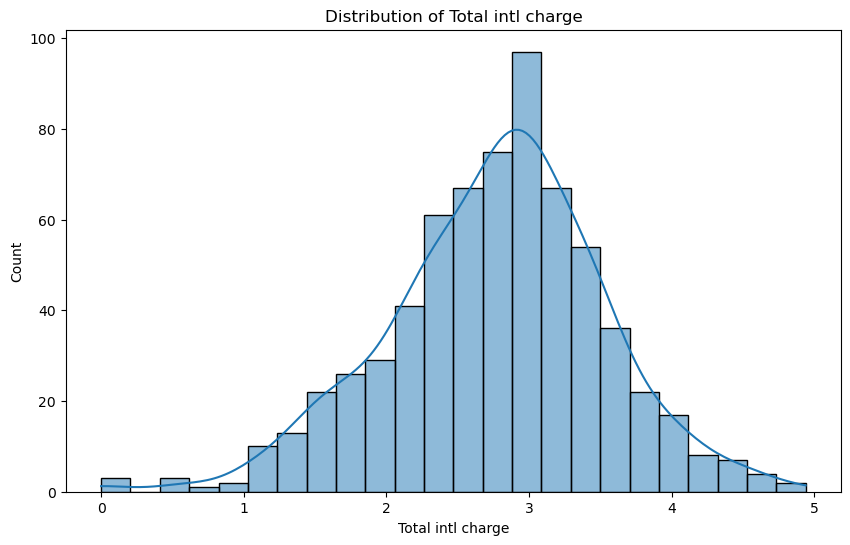

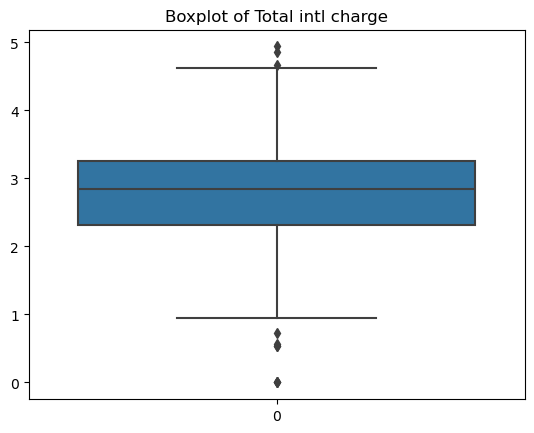

In [25]:
#numerical data visualization
for col in num_features:
    plt.figure(figsize=(10,6))
    sns.histplot(data[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    


Univariate analysis

distribution of total day minutes show us that the average user uses around 150 - 250 minutes per day and this is crucial if we want to attract more customers we have to introduce plans targetting this groups with discounted pricing which in turns reduces chances of churn

boxplot meadian 175  lower bound 150 upper ound 225 that means 75 percent of data lies between 150 -225
there are few outliers in the boxplot


Target Variable Interpretation

target variable churn represents whether customer discontinued service in favour of competitor after the observation window  
churn is operationally irreversavle in shortterm and as customer churns revenue from that customer is permanently   lost unless reacqusition occurs
so thereby accurately identifying churn probe customers before they leave is critical for business value

In [29]:
data["Area code"].value_counts()
data["State"].value_counts()


State
AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: count, dtype: int64

In [15]:
#CORRELATION AND HEATMAPS 
#select on numerical variables as correlation can only be found for those
numeric = data.select_dtypes(include=['int64','float64'])
correlation_matrix = numeric.corr()

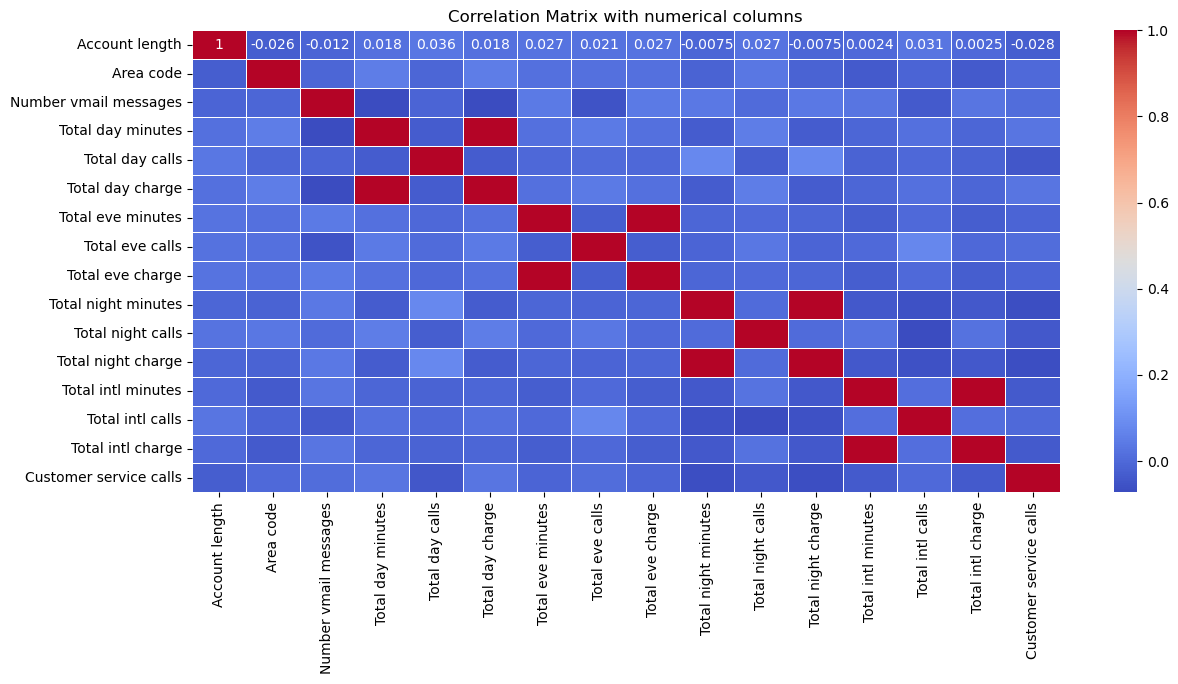

In [16]:
plt.figure(figsize = (14,6))
sns.heatmap(correlation_matrix , annot = True,cmap = 'coolwarm',linewidth = 0.5)
plt.title("Correlation Matrix with numerical columns")
plt.show()

Error cost analysis ----> False negatives vs false positives

In the context of telecom churn, prediction errors have asymmetric business costs.

A false negative (failing to identify a customer who will churn) results in no retention action being taken, leading to permanent customer loss and direct revenue impact. This represents a high-cost error.

A false positive (incorrectly flagging a loyal customer as a churn risk) results in unnecessary retention offers or discounts, which incur a relatively smaller operational cost compared to losing a customer entirely.

Therefore, false negatives are more costly than false positives, and the modeling objective should prioritize capturing as many true churners as possible.

False positives are not much expensive as moderators flag not churning customer as churn and this makes them give more discount so it's less expensive False negatives are more expensive as we don't take action for customer to stay or not churn Success should be measured in terms of how good the model is able to genralize and predict accurately what customers are going to do Like truepostives and true negatives


The churn target variable is imbalanced, with a significantly larger proportion of non-churn customers.

In such imbalanced settings, accuracy is a misleading metric, as a model can achieve high accuracy by always predicting the majority class while providing no business value.

Therefore, evaluation metrics must be chosen to reflect the cost of misclassification rather than raw correctness.

Metrics selection -
here in this business fn are more costly than fp 
so we choose recall metrics
we choose pr auc  as metric for this business model why?? -->  pr auc focuses on actual churners while not disturbing loyal customers and roc auc only focuses on ranking system

Data leakage 

when model contains data that would not be present by the time churn happens models gets future data, predictions are made by feature encoding future variables for target 
data leakage gives optimistic results but fails in deployement
ex --> customer service calls are only done when customer is likely to churn this gives data not present while churn happens

for each feature we have to understand if it is present at time of churn 
 0   State                  
 1   Account length         
 2   Area code              
 3   International plan     
 4   Voice mail plan     ol   
 5   Number vmail messagnt64  
 6   Total day minutes loat64
 7   Total day calls int64  
 8   Total day char float64
 9   Total eve minut  float64
 10  Total eve cal   int64  
 11  Total eve ch    float64
 12  Total nightl    float64
 13  Total nighll    int64  
 14  Total nighull    float64
 15  Total innull    float64
 16  Total i-null    int64  
 17  Total in-null    float64
 18  Custom non-null    int64  
 19  Chu6

 all are valid except customer service calls as its future data


 i will not use features state area code which are cautious they may introdcue memorization for model and fail production
 7 non-null    bool 